In [1]:
# https://hoonzi-text.tistory.com/19
# https://techblog-history-younghunjo1.tistory.com/114

import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt

In [2]:
# 데이터 가져오기
df = pd.read_csv('./final.csv')
print('data size->', len(df))

data size-> 346


In [3]:
df.head()
# df[:5] # 상위 5개 출력

,Unnamed: 0,Document,tokenizedDocument,dm1,dm2,dm3,dm4,dm5,dm6,dm7,...,dm91,dm92,dm93,dm94,dm95,dm96,dm97,dm98,dm99,dm100
0,0,운영체제 서비스 (Operating System Services),운영체제 서비스,0.714455,-0.531385,2.488015,-0.770630,0.112286,0.774671,2.070887,...,-0.610353,-1.074397,-0.708204,-0.606940,-1.245999,1.037042,0.395951,0.475926,0.371759,-1.622231
1,1,운영체제 사용자 인터페이스 (User Operating System Interface),운영체제 사용자 인터페이스,1.373194,-2.268541,2.041227,-1.548548,0.202811,0.251074,0.367272,...,-0.636907,-0.851541,-2.177040,-1.377887,0.282307,1.705836,1.317941,1.302224,-1.182694,-0.189527
2,2,시스템 콜 (System Calls),시스템 콜,0.011394,-0.826875,2.973761,-0.366313,-0.839046,0.789231,0.961213,...,-0.595384,0.178099,1.141711,-1.204290,-0.019782,0.544513,2.611695,1.183234,-0.109376,-0.170399
3,3,시스템 콜 유형 (Types of System Calls),시스템 콜 유형,-0.314897,-1.808564,2.901775,-0.102677,-0.380242,0.683322,0.860649,...,0.153475,0.073037,1.136598,-1.001038,0.101517,0.996975,2.293804,1.101085,-0.827427,0.046568
4,4,시스템 프로그램 (System Programs),시스템 프로그램,0.597797,-4.119634,4.071386,-0.778798,-0.830832,0.947624,2.868076,...,1.820633,-0.196410,-0.282522,-2.117036,1.165344,1.074218,3.273731,1.062482,0.584410,-1.640707


In [4]:
# NULL 값 존재 유무
print(df.isnull().values.any())

False


In [5]:
df = df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(df.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [6]:
print(len(df)) # 개수 출력

346


In [7]:
okt = Okt() # 형태소 분석기 객체 생성

'''
# Okt의 nouns를 사용한 토큰화
noun_list = []
for content in df['tokenizedDocument']: 
    nouns = okt.nouns(content) # 명사만 추출하기, 결과값은 명사 리스트
    noun_list.append(nouns)
'''

# Okt의 morph를 사용한 토큰화
tokenized_data = []
for sentence in df['tokenizedDocument']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    tokenized_data.append(tokenized_sentence)

# 명사 추출 방식의 토큰화에 사용
# df['nouns'] = noun_list
# tokenized_data = df['nouns'].tolist()

# morph 방식의 토큰화에 사용
df['tokenized_data'] = tokenized_data
tokenized_data = df['tokenized_data'].tolist()

최대 길이 : 34
평균 길이 : 5.07514450867052


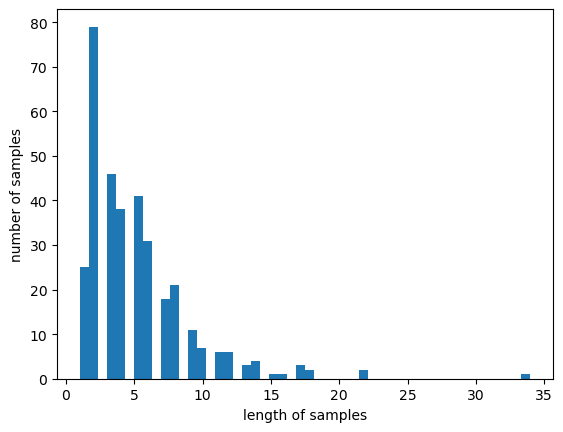

In [8]:
# 길이 분포 확인
print('최대 길이 :',max(len(review) for review in tokenized_data))
print('평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [9]:
tokenized_data[:5] # 상위 5개 출력

[['운영체제', '서비스'],
 ['운영체제', '사용자', '인터페이스'],
 ['시스템', '콜'],
 ['시스템', '콜', '유형'],
 ['시스템', '프로그램']]

In [10]:
df_temp = df.iloc[:346, 3:103]

In [11]:
df_temp

,dm1,dm2,dm3,dm4,dm5,dm6,dm7,dm8,dm9,dm10,...,dm91,dm92,dm93,dm94,dm95,dm96,dm97,dm98,dm99,dm100
0,0.714455,-0.531385,2.488015,-0.770630,0.112286,0.774671,2.070887,1.770209,-2.353306,1.783039,...,-0.610353,-1.074397,-0.708204,-0.606940,-1.245999,1.037042,0.395951,0.475926,0.371759,-1.622231
1,1.373194,-2.268541,2.041227,-1.548548,0.202811,0.251074,0.367272,1.672797,-2.467688,1.628929,...,-0.636907,-0.851541,-2.177040,-1.377887,0.282307,1.705836,1.317941,1.302224,-1.182694,-0.189527
2,0.011394,-0.826875,2.973761,-0.366313,-0.839046,0.789231,0.961213,1.684802,-3.608681,0.754566,...,-0.595384,0.178099,1.141711,-1.204290,-0.019782,0.544513,2.611695,1.183234,-0.109376,-0.170399
3,-0.314897,-1.808564,2.901775,-0.102677,-0.380242,0.683322,0.860649,1.900799,-3.395546,0.877328,...,0.153475,0.073037,1.136598,-1.001038,0.101517,0.996975,2.293804,1.101085,-0.827427,0.046568
4,0.597797,-4.119634,4.071386,-0.778798,-0.830832,0.947624,2.868076,3.423932,-5.139442,0.825764,...,1.820633,-0.196410,-0.282522,-2.117036,1.165344,1.074218,3.273731,1.062482,0.584410,-1.640707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.222149,-3.372326,3.010398,-1.379068,-1.122083,-1.308177,-0.303563,1.678100,-2.084328,0.348584,...,0.933681,1.303830,-1.493170,-2.017200,0.774388,0.170071,0.344846,2.664122,-0.876150,-2.341106
342,0.212965,-1.827281,3.537088,-1.536552,-0.451717,-1.553486,0.283955,1.621245,-2.918727,0.658755,...,1.060881,-0.256200,-2.471534,-1.501794,-0.710068,0.662465,1.444199,-0.119418,-0.345229,-0.273893
343,0.028034,-1.855329,1.726132,-0.514380,0.055517,-0.897894,-0.397566,1.820389,-1.111108,1.315148,...,1.477395,-0.121360,-0.036039,-0.523707,-0.609615,0.579980,0.493013,0.585409,-0.329471,-0.318402
344,0.375210,-1.566365,1.840266,0.172384,-0.653272,0.393887,0.515321,1.490309,-2.052484,1.067986,...,2.143717,-0.657411,-1.112525,0.238495,0.045189,0.705270,1.014119,-0.178653,0.173723,-0.018322


## DBSCAN

sklearn.cluster.DBSCAN 이용. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

주요 파라미터:
- `eps`: 서로 이웃으로 간주되는 두 샘플 사이의 최대 거리. 기본값=0.5.
- `min_samples`: 어떤 샘플이 핵심 샘플로 간주되기 위해 자신의 이웃에 존재해야 하는 샘플의 개수(자신도 포함). 기본값=5.

주요 속성:
- `labels_`: 각 샘플의 클러스터 레이블(핵심 샘플의 인덱스). 이상치 샘플의 레이블은 -1.
- `core_sample_indices_`: 핵심 샘플의 인덱스. (핵심 샘플 개수,) 모양의 다차원 배열.
- `components_`: 핵심 샘플. (핵심 샘플 개수, 특성 개수) 모양의 다차원 배열.

선다형 객관식 출제를 할 때는, 선지 중 하나를 오답으로 넣을 것이므로 적어도 '선지의 개수 - 1' 개만큼의 같은 클러스터에 소속된 벡터가 필요하다. 즉, 선지 5개를 상정한다면 최소한 4개의 선지는 같은 클러스터에서 출제될 필요가 있다. 이러한 조건이 존재하므로 min_samples는 '선지의 개수 - 1' 로 하는 것이 적합하다고 판단했다.

In [12]:
# DBSCAN을 활용한 군집화
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.0001, min_samples=5, metric = "cosine")
result = model.fit_predict(df_temp) # DBSCAN의 .fit_predict() 함수를 사용

In [13]:
result

array([ 0,  1, -1,  2,  3, -1,  4, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
        0, -1,  1, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  3, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1,
       -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3,
       -1, -1, -1, -1, -1

In [14]:
# 각 샘플의 레이블: 핵심 샘플들의 인덱스 또는 이상치 인덱스(-1)
result[:10]

array([ 0,  1, -1,  2,  3, -1,  4, -1, -1, -1], dtype=int64)

In [15]:
# 핵심 샘플들
model.components_[:5]

array([[ 7.14455300e-01, -5.31384500e-01,  2.48801500e+00,
        -7.70629800e-01,  1.12286470e-01,  7.74671300e-01,
         2.07088730e+00,  1.77020900e+00, -2.35330630e+00,
         1.78303860e+00, -1.52544600e+00, -1.17658100e+00,
        -1.10703720e+00,  4.42605560e-01,  1.71463040e+00,
        -1.99590410e-01, -1.91826080e+00, -1.49604290e-01,
        -4.99330220e-01, -1.98056380e+00,  1.33747630e+00,
        -6.05109500e-01, -2.26519160e+00, -5.14760500e-01,
        -2.93334580e+00,  2.35693470e-01, -4.06357300e-02,
         6.94103500e-01,  2.70678500e+00,  6.06962740e-01,
         2.64876650e+00, -1.09482290e+00, -1.07393630e+00,
         7.98740900e-01, -4.60650350e-01,  2.85037280e-01,
         8.45990240e-01,  1.63535640e-01, -4.61852940e-01,
         2.01855750e+00, -1.15322700e-01,  2.61840270e+00,
        -1.07241150e+00,  1.09742520e+00,  5.76488400e-01,
         2.62438450e-01,  5.07581900e-01,  6.65257900e-01,
        -7.35826200e-01, -6.54467340e-01,  8.23961700e-0

In [16]:
# 핵심 샘플들의 인덱스
model.core_sample_indices_[:10]

array([ 0,  1,  3,  4,  6, 14, 17, 19, 22, 28], dtype=int64)

In [17]:
df['result'] = result

In [18]:
df.head()

,Unnamed: 0,Document,tokenizedDocument,dm1,dm2,dm3,dm4,dm5,dm6,dm7,...,dm93,dm94,dm95,dm96,dm97,dm98,dm99,dm100,tokenized_data,result
0,0,운영체제 서비스 (Operating System Services),운영체제 서비스,0.714455,-0.531385,2.488015,-0.770630,0.112286,0.774671,2.070887,...,-0.708204,-0.606940,-1.245999,1.037042,0.395951,0.475926,0.371759,-1.622231,"[운영체제, 서비스]",0
1,1,운영체제 사용자 인터페이스 (User Operating System Interface),운영체제 사용자 인터페이스,1.373194,-2.268541,2.041227,-1.548548,0.202811,0.251074,0.367272,...,-2.177040,-1.377887,0.282307,1.705836,1.317941,1.302224,-1.182694,-0.189527,"[운영체제, 사용자, 인터페이스]",1
2,2,시스템 콜 (System Calls),시스템 콜,0.011394,-0.826875,2.973761,-0.366313,-0.839046,0.789231,0.961213,...,1.141711,-1.204290,-0.019782,0.544513,2.611695,1.183234,-0.109376,-0.170399,"[시스템, 콜]",-1
3,3,시스템 콜 유형 (Types of System Calls),시스템 콜 유형,-0.314897,-1.808564,2.901775,-0.102677,-0.380242,0.683322,0.860649,...,1.136598,-1.001038,0.101517,0.996975,2.293804,1.101085,-0.827427,0.046568,"[시스템, 콜, 유형]",2
4,4,시스템 프로그램 (System Programs),시스템 프로그램,0.597797,-4.119634,4.071386,-0.778798,-0.830832,0.947624,2.868076,...,-0.282522,-2.117036,1.165344,1.074218,3.273731,1.062482,0.584410,-1.640707,"[시스템, 프로그램]",3


In [19]:
for cluster_num in set(result):
    # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
    if(cluster_num == -1 or cluster_num == 0): 
        continue
    else:
        print("cluster num : {}".format(cluster_num))
        temp_df = df[df['result'] == cluster_num] # cluster num 별로 조회
        for title in temp_df['Document']:
            print(title) # 토큰별로 나타내도록 한다.
        print()

cluster num : 1
 운영체제 사용자 인터페이스 (User Operating System Interface)
사용자 인터페이스
사용자 인터페이스 – CLI
사용자 인터페이스 – CLI
사용자 인터페이스 – GUI

cluster num : 2
 시스템 콜 유형 (Types of System Calls)
시스템 콜 유형  
시스템 콜 유형  
시스템 콜 유형  
시스템 콜 유형  

cluster num : 3
 시스템 프로그램 (System Programs)
시스템 프로그램 (System Programs)  
시스템 프로그램 (System Programs)  
시스템 프로그램 (System Programs)  
시스템 프로그램 (System Programs)  
시스템 프로그램 (System Programs)  
 시스템 프로그램

cluster num : 4
 운영체제 구조 (Operating System Structure)
운영체제 구조 (structure)
간단한 구조 -- MS-DOS
좀더 복잡한 구조 - UNIX
Android Architecture (구조)



## k-평균

sklearn.cluster.Kmeans 이용. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

주요 파라미터:
- `n_clusters`: 클러스터 수(k). 기본값=8.
- `init`: 초기화 방법. {'k-means++', 'random'}. 기본값='k-means++'.
- `n_init`: k-평균 알고리즘이 서로 다른 센트로이드 시드로 실행되는 횟수. 기본값=10. 이너셔(inertia) 기준으로 가장 좋은 결과가 리턴됨.

주요 속성:
- `inertia_`: 이너셔
- `cluster_centers_`: 각 클러스터 중심의 좌표. (클러스터 수, 특성 개수) 모양의 다차원 배열.
- `labels_`: 클러스터링 결과 각 샘플이 속한 클러스터 레이블(인덱스). (샘플 개수,) 모양의 다차원 배열.

우선은 DBSCAN에서 eps를 0.0001, min_samples를 4로 설정했을 때 나타난 클러스터 개수인 14개로 분류해본다.

In [20]:
# K-means로 군집 개수를 수동으로 정해서 문서 군집화시키기
from sklearn.cluster import KMeans
import numpy as np

# 랜덤하게 실행되는 부분들에 대해 다음에 실행해도 동일한 결과를 얻기 위해 설정
# random_state는 여러 번 시도했을 때도 학습 결과가 동일하도록 random 함수의 값을 고정시키는 seed의 역할을 수행한다. 
# 값이 바뀌면 다른 값으로 고정된다.
seed = 11 
rng = np.random.default_rng(seed)

# 일단 DBSCAN에서 나온 14개 클러스터로 분류
k = 14
model_kmeans = KMeans(n_clusters=k, max_iter=10000, random_state=seed)
# 비지도 학습이니 feature로만 학습시키고 예측
result_kmeans = model_kmeans.fit_predict(df_temp) # k-Means의 .fit_predict() 함수를 사용

# 군집화한 레이블값들을 df 에 추가하기
df['cluster_label_kmeans_DBSCAN'] = result_kmeans
# print(df.sort_values(by=['cluster_label_kmeans']))

In [21]:
for i in range(0, len(result_kmeans)):
    print(result_kmeans[i])

4
5
3
6
3
0
2
13
13
3
9
6
9
13
4
3
1
4
1
5
5
5
4
1
3
6
6
6
4
1
3
13
6
6
8
1
7
1
0
4
1
6
6
6
0
1
4
1
1
0
1
4
1
4
1
1
1
0
13
5
6
6
3
0
5
6
6
6
6
5
0
6
6
0
13
6
5
6
0
5
6
12
13
6
12
3
6
0
0
3
3
12
5
6
0
6
6
11
3
0
6
3
6
0
3
6
13
6
6
9
6
13
6
0
6
6
6
6
12
6
0
3
6
6
6
6
5
6
13
0
6
13
13
0
6
6
1
6
8
8
8
12
0
1
1
12
0
0
6
1
13
1
6
7
0
6
6
1
0
6
1
1
3
4
0
0
3
3
12
5
6
13
6
0
13
6
6
13
2
13
6
6
6
6
6
6
6
5
3
1
6
6
3
2
8
1
12
0
3
7
4
3
8
13
1
6
1
0
1
3
8
6
6
12
6
3
13
7
6
6
3
4
13
13
13
6
6
6
0
0
2
9
6
1
0
0
0
9
9
9
9
13
9
9
10
0
9
12
13
6
0
12
12
13
9
6
2
13
0
6
9
2
13
9
2
0
0
2
2
13
1
2
0
3
6
2
2
2
2
2
2
6
12
1
6
6
13
2
6
9
13
6
6
1
9
6
2
3
6
0
12
0
6
6
2
6
3
13
0
0
6
12
6
13
2
6
2
13
6
6
2
12
2
0
1
6
6
0
13
0
0
10
3
13
13
1
6
6
3
0
6
6
5
6
13
6


In [22]:
model_kmeans.labels_ # 클러스터링 수행 결과가 labels_ 속성에 저장됨

array([ 4,  5,  3,  6,  3,  0,  2, 13, 13,  3,  9,  6,  9, 13,  4,  3,  1,
        4,  1,  5,  5,  5,  4,  1,  3,  6,  6,  6,  4,  1,  3, 13,  6,  6,
        8,  1,  7,  1,  0,  4,  1,  6,  6,  6,  0,  1,  4,  1,  1,  0,  1,
        4,  1,  4,  1,  1,  1,  0, 13,  5,  6,  6,  3,  0,  5,  6,  6,  6,
        6,  5,  0,  6,  6,  0, 13,  6,  5,  6,  0,  5,  6, 12, 13,  6, 12,
        3,  6,  0,  0,  3,  3, 12,  5,  6,  0,  6,  6, 11,  3,  0,  6,  3,
        6,  0,  3,  6, 13,  6,  6,  9,  6, 13,  6,  0,  6,  6,  6,  6, 12,
        6,  0,  3,  6,  6,  6,  6,  5,  6, 13,  0,  6, 13, 13,  0,  6,  6,
        1,  6,  8,  8,  8, 12,  0,  1,  1, 12,  0,  0,  6,  1, 13,  1,  6,
        7,  0,  6,  6,  1,  0,  6,  1,  1,  3,  4,  0,  0,  3,  3, 12,  5,
        6, 13,  6,  0, 13,  6,  6, 13,  2, 13,  6,  6,  6,  6,  6,  6,  6,
        5,  3,  1,  6,  6,  3,  2,  8,  1, 12,  0,  3,  7,  4,  3,  8, 13,
        1,  6,  1,  0,  1,  3,  8,  6,  6, 12,  6,  3, 13,  7,  6,  6,  3,
        4, 13, 13, 13,  6

DBSCAN에서 eps를 0.0001, min_samples를 4로 설정했을 때 나타난 클러스터 개수인 14개로 분류했을 때를 기준으로 한 클러스터링 결과이다.

In [23]:
for cluster_num in set(model_kmeans.labels_):
    print("kmeans cluster num : {}".format(cluster_num))
    temp_df = df[df['cluster_label_kmeans_DBSCAN'] == cluster_num] # cluster num 별로 조회
    for title in temp_df['Document']:
        print(title)
    print()

kmeans cluster num : 0
 운영체제 설계 및 구현 (Operating System Design and Implementation)
 통신은 메시지 전달 기법 (운영체제가 패킷을 이동하는데 관여함) 또는 공유 메모리를 이용 
 운영체제는 올바르고 일관된 계산을 보장하기 위해 각 타입의 오류에대해 올바른 조처를 취해야 한다 
 다수의 사용자나 다수의 작업들이 동시에 실행될 때 각각에 자원을할당해야 함– 자원 종류 - CPU cycles, main memory, file storage, I/O devices 
 외부(external)로부터 시스템 보안을 유지하기 위해 사용자 인증(User Authentication)이 필요하고 부적합한 접근(invalid access attempts)시도로부터 입출력 장치를 보호해야 한다 
선택 가능한 여러 개의 명령어 해석기 (shells) 제공 – UNIX, Linux 
 사용자 친화적인 상징 인터페이스(metaphor interface)
인터페이스 내의 대상에 대한 다양한 마우스 버튼으로 다수의 행위가발생한다(정보 제공, 선택사항, 실행, 폴더 열기 등)
Unix와 Linux는 선택적인 GUI(CDE, KDE, GNOME)를 가진 CLI이다   
 일반적으로 고급 언어(C 또는 C++)로 작성된 루틴 형태로 제공
 대부분 직접적인 시스템 콜 사용보다는 고급의 Application Program Interface (API)를 통해 접근한다 
Machine(JVM)의 Java APIPOSIX (portable operating system interface) : 이식 가능 운영 체제 인터페이스  서로 다른 UNIX OS의 공통 API를 정리 
 통상적으로, 각 시스템 콜에 대하여 숫자가 부여된다
시스템 콜의 반환 상태와 해당 반환 값을 반환한다   
 운영체제에 매개변수를 전달하는 세가지 일반적인 방법  가장 간단한 방법: 매개변수를 레지스터에 전달
 운영체제에 매개변수를 전달하는 세가지 일반적인 방법 
적재(lo

이번에는 병합 클러스터링에서 나온 클러스터 개수인 26개로 시도한다.

In [24]:
k = 26
model_kmeans = KMeans(n_clusters=k, max_iter=10000, random_state=seed)
result_kmeans = model_kmeans.fit_predict(df_temp) # k-Means의 .fit_predict() 함수를 사용

# 군집화한 레이블값들을 df 에 추가하기
df['cluster_label_kmeans_Dendrogram'] = result_kmeans

for i in range(0, len(result_kmeans)):
    print(result_kmeans[i])

19
18
10
10
9
2
21
4
4
10
2
3
2
4
19
3
3
19
3
18
13
18
19
3
8
4
13
3
19
3
13
4
13
13
13
3
7
3
1
19
3
0
0
23
4
3
19
3
1
23
3
19
1
19
3
25
1
1
2
18
13
13
3
23
18
13
3
23
4
18
23
23
23
23
4
23
18
23
1
18
23
11
4
23
11
10
3
23
1
3
10
11
14
23
1
2
13
12
10
4
23
10
4
4
10
3
4
13
23
17
10
4
10
23
23
10
23
13
11
10
23
13
4
23
10
10
18
4
4
1
23
4
4
1
23
4
1
10
3
13
13
6
23
1
1
6
1
1
10
1
4
3
3
7
1
13
23
1
1
10
25
1
10
19
1
1
10
8
2
18
10
4
4
3
4
23
23
4
21
4
4
10
23
4
10
4
13
13
9
3
23
23
9
21
3
1
3
21
8
7
19
9
3
4
1
23
3
23
1
9
13
13
13
3
23
8
4
7
23
13
9
19
4
4
4
23
3
10
2
2
21
4
23
2
1
2
2
2
0
0
2
4
0
2
20
1
0
3
4
23
23
11
11
22
21
23
22
4
13
23
0
21
4
0
5
3
1
22
21
16
3
21
21
9
23
21
22
21
22
22
22
23
2
24
10
23
4
21
3
15
2
3
23
1
15
23
21
10
23
1
3
21
3
23
21
23
10
4
1
23
23
3
23
4
22
10
21
2
23
3
5
2
22
2
3
23
4
1
4
1
3
20
9
4
4
23
3
23
10
1
23
23
18
23
4
3


In [25]:
model_kmeans.labels_ # 클러스터링 수행 결과가 labels_ 속성에 저장됨

array([19, 18, 10, 10,  9,  2, 21,  4,  4, 10,  2,  3,  2,  4, 19,  3,  3,
       19,  3, 18, 13, 18, 19,  3,  8,  4, 13,  3, 19,  3, 13,  4, 13, 13,
       13,  3,  7,  3,  1, 19,  3,  0,  0, 23,  4,  3, 19,  3,  1, 23,  3,
       19,  1, 19,  3, 25,  1,  1,  2, 18, 13, 13,  3, 23, 18, 13,  3, 23,
        4, 18, 23, 23, 23, 23,  4, 23, 18, 23,  1, 18, 23, 11,  4, 23, 11,
       10,  3, 23,  1,  3, 10, 11, 14, 23,  1,  2, 13, 12, 10,  4, 23, 10,
        4,  4, 10,  3,  4, 13, 23, 17, 10,  4, 10, 23, 23, 10, 23, 13, 11,
       10, 23, 13,  4, 23, 10, 10, 18,  4,  4,  1, 23,  4,  4,  1, 23,  4,
        1, 10,  3, 13, 13,  6, 23,  1,  1,  6,  1,  1, 10,  1,  4,  3,  3,
        7,  1, 13, 23,  1,  1, 10, 25,  1, 10, 19,  1,  1, 10,  8,  2, 18,
       10,  4,  4,  3,  4, 23, 23,  4, 21,  4,  4, 10, 23,  4, 10,  4, 13,
       13,  9,  3, 23, 23,  9, 21,  3,  1,  3, 21,  8,  7, 19,  9,  3,  4,
        1, 23,  3, 23,  1,  9, 13, 13, 13,  3, 23,  8,  4,  7, 23, 13,  9,
       19,  4,  4,  4, 23

병합 클러스터링에서 나온 클러스터 개수인 26개를 클러스터 개수로 정하여 분류했을 때를 기준으로 한 클러스터링 결과이다.

In [26]:
for cluster_num in set(model_kmeans.labels_):
    print("kmeans cluster num : {}".format(cluster_num))
    temp_df = df[df['cluster_label_kmeans_Dendrogram'] == cluster_num] # cluster num 별로 조회
    for title in temp_df['Document']:
        print(title)
    print()

kmeans cluster num : 0
오류 탐지 (Error Detection)
 운영체제는 가능한 모든 오류를 인지하고 있어야 함
정책 (Policies):  무엇을 할 것인가?
기법 (Mechanism):  어떻게 할 것인가?
 정책은 장소가 바뀌거나 시간의 흐름에 따라 변경될 수 있다 
특정 사용자에게 타이머를 얼마나 오랫동안 설정할 것인지 결정 ( ) 
 Emulation으로 운영체제를 다른 하드웨어에서 수행되는 것도 가능하다 
 다양한 방법으로 운영체제의 구성을 할 수 있다

kmeans cluster num : 1
 통신은 메시지 전달 기법 (운영체제가 패킷을 이동하는데 관여함) 또는 공유 메모리를 이용 
자원 할당(resource allocation)
 어떤 사용자가 어떤 자원을 얼만큼 쓰는지 기록하고 관리 
 보호는 시스템 자원에 대한 모든 접근이 통제되도록 보장하는 것
 외부(external)로부터 시스템 보안을 유지하기 위해 사용자 인증(User Authentication)이 필요하고 부적합한 접근(invalid access attempts)시도로부터 입출력 장치를 보호해야 한다 
Unix와 Linux는 선택적인 GUI(CDE, KDE, GNOME)를 가진 CLI이다   
 대부분 직접적인 시스템 콜 사용보다는 고급의 Application Program Interface (API)를 통해 접근한다 
Machine(JVM)의 Java APIPOSIX (portable operating system interface) : 이식 가능 운영 체제 인터페이스  서로 다른 UNIX OS의 공통 API를 정리 
적재(load), 실행(execute)
메모리 할당 및 제거(allocate and free memory)
프로세스 간에 공유 자료 접근을 관리하는 locks 
 장치 관리 (Device management)
장치 요청, 장치 방출 (request device, release device)
장치 속성 획득 및 설정 (get device attr

k-means의 k 값, 즉 클러스터 개수 설정의 근거는 하나뿐만이 아닐 것이다. 물론, 실질적으로 의미가 있는 형태로의 클러스터링이 될 것이라 기대하는 근거는 있어야 한다. 이러한 근거는 강의자료의 단원 수, 강의자료에서 나온 개념 수, PDF의 장 수 등이 있을 것이다. 

이번에는 강의자료의 단원 수로 시도해보고자 한다. 

우리가 사용한 강의자료인 운영체제 2장에서 나온 단원은 '운영체제 서비스', '운영체제 사용자 인터페이스', '시스템 콜', '시스템 콜 유형', '시스템 프로그램', '운영체제 설계 및 구현', '운영체제 구조', '운영체제 디버깅', '운영체제 생성', '시스템 부팅' 이렇게 총 10개가 있다.

In [27]:
k = 10
model_kmeans = KMeans(n_clusters=k, max_iter=10000, random_state=seed)
result_kmeans = model_kmeans.fit_predict(df_temp) # k-Means의 .fit_predict() 함수를 사용

# 군집화한 레이블값들을 df 에 추가하기
df['cluster_label_kmeans_Sections'] = result_kmeans

for i in range(0, len(result_kmeans)):
    print(result_kmeans[i])

4
1
4
4
8
0
3
4
4
5
2
5
2
4
4
5
5
4
5
1
1
1
4
5
8
5
1
5
4
5
1
4
4
4
1
5
6
5
5
4
5
2
2
5
2
5
4
5
5
2
5
4
5
4
5
5
2
5
0
1
1
5
8
0
1
1
5
5
2
1
2
4
4
5
0
3
1
1
2
1
5
0
0
4
7
4
5
0
0
5
4
7
1
1
2
5
1
2
5
0
4
1
4
0
5
5
4
4
5
9
4
4
4
2
3
4
5
1
2
4
2
4
4
3
4
4
1
4
0
0
5
4
4
5
4
4
5
4
5
1
1
0
5
5
5
0
5
3
4
5
0
5
5
6
0
5
5
5
5
4
5
5
1
4
0
5
1
8
5
1
5
4
4
5
4
3
5
4
3
4
4
4
5
5
5
3
3
1
8
5
4
5
8
3
5
3
5
4
5
6
4
8
5
4
3
4
5
5
5
8
1
5
5
5
4
5
4
6
5
5
8
4
4
0
0
5
5
4
0
2
3
2
4
5
2
2
2
2
2
2
2
2
2
2
3
2
2
0
4
0
0
0
0
4
2
5
3
4
0
5
2
3
4
2
3
5
0
3
3
0
5
3
3
8
5
3
2
3
3
3
3
4
0
2
3
1
0
3
5
2
0
5
5
5
2
4
3
1
4
0
5
0
5
4
3
3
5
0
2
2
4
5
5
4
3
4
3
0
4
5
3
0
3
0
5
5
4
0
4
2
5
3
8
4
0
5
5
3
4
0
4
2
1
4
4
5


In [28]:
model_kmeans.labels_ # 클러스터링 수행 결과가 labels_ 속성에 저장됨

array([4, 1, 4, 4, 8, 0, 3, 4, 4, 5, 2, 5, 2, 4, 4, 5, 5, 4, 5, 1, 1, 1,
       4, 5, 8, 5, 1, 5, 4, 5, 1, 4, 4, 4, 1, 5, 6, 5, 5, 4, 5, 2, 2, 5,
       2, 5, 4, 5, 5, 2, 5, 4, 5, 4, 5, 5, 2, 5, 0, 1, 1, 5, 8, 0, 1, 1,
       5, 5, 2, 1, 2, 4, 4, 5, 0, 3, 1, 1, 2, 1, 5, 0, 0, 4, 7, 4, 5, 0,
       0, 5, 4, 7, 1, 1, 2, 5, 1, 2, 5, 0, 4, 1, 4, 0, 5, 5, 4, 4, 5, 9,
       4, 4, 4, 2, 3, 4, 5, 1, 2, 4, 2, 4, 4, 3, 4, 4, 1, 4, 0, 0, 5, 4,
       4, 5, 4, 4, 5, 4, 5, 1, 1, 0, 5, 5, 5, 0, 5, 3, 4, 5, 0, 5, 5, 6,
       0, 5, 5, 5, 5, 4, 5, 5, 1, 4, 0, 5, 1, 8, 5, 1, 5, 4, 4, 5, 4, 3,
       5, 4, 3, 4, 4, 4, 5, 5, 5, 3, 3, 1, 8, 5, 4, 5, 8, 3, 5, 3, 5, 4,
       5, 6, 4, 8, 5, 4, 3, 4, 5, 5, 5, 8, 1, 5, 5, 5, 4, 5, 4, 6, 5, 5,
       8, 4, 4, 0, 0, 5, 5, 4, 0, 2, 3, 2, 4, 5, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 0, 4, 0, 0, 0, 0, 4, 2, 5, 3, 4, 0, 5, 2, 3, 4, 2,
       3, 5, 0, 3, 3, 0, 5, 3, 3, 8, 5, 3, 2, 3, 3, 3, 3, 4, 0, 2, 3, 1,
       0, 3, 5, 2, 0, 5, 5, 5, 2, 4, 3, 1, 4, 0, 5,

강의자료의 단원의 개수인 10개를 클러스터 개수로 정하여 분류했을 때를 기준으로 한 클러스터링 결과이다.

In [29]:
for cluster_num in set(model_kmeans.labels_):
    print("kmeans cluster num : {}".format(cluster_num))
    temp_df = df[df['cluster_label_kmeans_Sections'] == cluster_num] # cluster num 별로 조회
    for title in temp_df['Document']:
        print(title)
    print()

kmeans cluster num : 0
 운영체제 설계 및 구현 (Operating System Design and Implementation)
 시스템 전체에 예방책이 제정되어 한다 
선택 가능한 여러 개의 명령어 해석기 (shells) 제공 – UNIX, Linux 
 년대 초 Xerox PARC 연구에서 시작
마우스 사용이 불가능하고바람직하지 않음
액션과 선택은 손동작에 근거
 일반적으로 고급 언어(C 또는 C++)로 작성된 루틴 형태로 제공
 대부분 직접적인 시스템 콜 사용보다는 고급의 Application Program Interface (API)를 통해 접근한다 
 통상적으로, 각 시스템 콜에 대하여 숫자가 부여된다
시스템 콜의 반환 상태와 해당 반환 값을 반환한다   
정상적 종료(end), 비정상적 종료(abort)
적재(load), 실행(execute)
읽기, 쓰기, 위치 변경 (read, write, reposition)
읽기, 쓰기, 위치 변경 (read, write, reposition)
시간과 날짜의 설정과 획득(get time or date, set time or date)
통신 연결 생성, 제거
접근 허용 반환 및 설정(Get and set permissions)
 일부는 시스템 시작 시 살아나고 끝난다
 일부는 시스템 시작해서 종료 시까지 살아있다
운영체제 설계 및 구현
구현 (Implementation)
초기 운영체제는 어셈블리 언어로 구현
그 후에 Algol과 PL/ 같은 시스템 프로그래밍 언어 사용
현재는 C, C++ 사용
 실제는 언어를 혼합 사용
코드 작성이 빠르며, 간결하고, 이해하기 쉽고 디버그도 쉽다 
모듈로 제대로 분할되지 않음
 최초의 UNIX
설계, 구현과 디버깅 간단
 Mach : 카네기 멜론 대학교에서 개발한 첫 번째 microkerne
마이크로커널은 확장하기 좋음
Modules)로 구현한다
각 핵심 컴포넌트가 분리되어 있음
 대부분의 현대 운영체제는 순수 한가지 모델만을 사용하지 않는다
앱 개발을 위한 C

이번에는 강의자료에서 나온 개념 수 시도해보고자 한다. 

우리가 사용한 강의자료인 운영체제 2장에서 나온 개념을 정리해보았다.

'운영체제 서비스', '사용자 인터페이스', '프로그램 실행', '입출력 연산', '파일 시스템', '통신', '메시지 전달', '공유 메모리', '오류 탐지', '자원 할당', '회계', '보호', '보안', 'CLI', 'GUI', '터치스크린', '시스템 콜' 'API', '프로세서 제어', '파일 관리', '장치 관리', '정보 관리', '보호', '시스템 프로그램', '사용자 목표', '시스템 목표', '정책', '기법', '계층적 접근', '마이크로 커널', '모듈', '하이브리드 시스템', '디버깅', '시스템 부트'

이렇게 총 33개의 개념이 있으나, 사용자마다 '개념'으로 정의하는 부분이 다를 수 있다는 리스크가 존재한다. 이를 해결하기 위해 사용자로부터 직접 개념의 수를 입력받아 k 값으로 사용하는 방법을 고려해봄직하다고 여겨진다.

In [30]:
k = 33
model_kmeans = KMeans(n_clusters=k, max_iter=10000, random_state=seed)
result_kmeans = model_kmeans.fit_predict(df_temp) # k-Means의 .fit_predict() 함수를 사용

# 군집화한 레이블값들을 df 에 추가하기
df['cluster_label_kmeans_Subjects'] = result_kmeans

for i in range(0, len(result_kmeans)):
    print(result_kmeans[i])

7
5
18
18
9
17
12
14
14
22
13
2
19
17
7
3
13
7
13
5
8
8
7
13
9
8
8
8
7
13
0
14
14
14
0
2
6
2
2
7
13
8
19
8
17
2
7
13
2
17
2
30
17
7
13
32
19
2
17
5
14
8
22
11
5
14
8
8
21
5
11
17
8
17
28
8
8
8
19
5
8
11
17
8
25
18
2
11
11
22
18
25
24
8
11
17
8
21
22
17
8
22
17
17
22
3
17
8
8
20
22
17
18
11
8
22
8
8
11
22
11
22
14
8
18
18
8
8
28
3
8
23
14
2
8
8
2
18
0
0
0
16
2
13
2
16
2
2
18
32
17
2
8
6
2
8
8
26
2
18
32
2
22
7
2
2
22
9
27
5
22
17
17
3
14
8
8
28
11
14
17
22
8
8
22
26
26
8
9
2
17
17
9
11
0
26
3
17
3
6
7
9
0
17
26
8
2
2
2
9
0
3
8
3
17
3
17
6
8
8
9
7
17
28
28
8
8
18
17
11
12
19
17
13
11
2
12
12
19
19
12
17
19
12
4
19
19
3
14
17
11
11
11
1
11
8
1
17
3
2
19
12
17
19
10
2
2
12
12
31
2
12
11
9
8
12
1
1
1
1
1
1
3
29
22
8
17
1
2
15
17
2
2
2
15
22
12
22
17
11
11
17
2
17
12
8
22
11
11
11
17
3
8
17
12
22
11
17
17
3
10
3
12
3
2
3
17
2
17
2
2
4
9
14
17
2
22
8
22
2
17
8
8
17
17
22


In [31]:
model_kmeans.labels_ # 클러스터링 수행 결과가 labels_ 속성에 저장됨

array([ 7,  5, 18, 18,  9, 17, 12, 14, 14, 22, 13,  2, 19, 17,  7,  3, 13,
        7, 13,  5,  8,  8,  7, 13,  9,  8,  8,  8,  7, 13,  0, 14, 14, 14,
        0,  2,  6,  2,  2,  7, 13,  8, 19,  8, 17,  2,  7, 13,  2, 17,  2,
       30, 17,  7, 13, 32, 19,  2, 17,  5, 14,  8, 22, 11,  5, 14,  8,  8,
       21,  5, 11, 17,  8, 17, 28,  8,  8,  8, 19,  5,  8, 11, 17,  8, 25,
       18,  2, 11, 11, 22, 18, 25, 24,  8, 11, 17,  8, 21, 22, 17,  8, 22,
       17, 17, 22,  3, 17,  8,  8, 20, 22, 17, 18, 11,  8, 22,  8,  8, 11,
       22, 11, 22, 14,  8, 18, 18,  8,  8, 28,  3,  8, 23, 14,  2,  8,  8,
        2, 18,  0,  0,  0, 16,  2, 13,  2, 16,  2,  2, 18, 32, 17,  2,  8,
        6,  2,  8,  8, 26,  2, 18, 32,  2, 22,  7,  2,  2, 22,  9, 27,  5,
       22, 17, 17,  3, 14,  8,  8, 28, 11, 14, 17, 22,  8,  8, 22, 26, 26,
        8,  9,  2, 17, 17,  9, 11,  0, 26,  3, 17,  3,  6,  7,  9,  0, 17,
       26,  8,  2,  2,  2,  9,  0,  3,  8,  3, 17,  3, 17,  6,  8,  8,  9,
        7, 17, 28, 28,  8

강의자료에 나온 개념의 수를 33개로 가정하고 이를 클러스터 개수로 정하여 분류했을 때를 기준으로 한 클러스터링 결과이다.

In [32]:
for cluster_num in set(model_kmeans.labels_):
    print("kmeans cluster num : {}".format(cluster_num))
    temp_df = df[df['cluster_label_kmeans_Subjects'] == cluster_num] # cluster num 별로 조회
    for title in temp_df['Document']:
        print(title)
    print()

kmeans cluster num : 0
파일 시스템
 파일 정보 보기
 파일 관리 (File management)
파일 생성 (create file), 파일 삭제 (delete file)
파일 열기 (open), 파일 닫기 (close file)
파일 관리
 파일 관리 (File Management) 
 파일 변경

kmeans cluster num : 1
하위 수준은 어셈블리어
 고급 언어(High-leve
계층적 접근 (Layered Approach)
 운영체제는 여러 개의 계층(layer, level)으로 구분
각 계층은 하위 계층 위에 만들어짐
최하위(계층  ) 계층은 하드웨어
최상위 계층(계층 N)은 사용자 인터페이스
 모듈화 함으로, 각 계층은 하부 계층의 함수(오퍼레이션)와 서비스만을사용한다
Mac OS X 커널(Darwin)은 부분적으로 Mach에 기초함

kmeans cluster num : 2
 운영체제가 사용자, 프로세스, 다른 시스템에 제공하는 서비스 설명
 파일 접근 권한 관리메시지 전달(Message Passing)공유 메모리(Shared Memory)
 동일한 컴퓨터 또는 네트워크로 연결된 컴퓨터에 있는 프로세스 간정보 교환
 통신은 메시지 전달 기법 (운영체제가 패킷을 이동하는데 관여함) 또는 공유 메모리를 이용 
 디버깅 장치는 사용자와 개발자의 효율적인 시스템 사용을 향상시킬수 있다 
자원 할당(resource allocation)
 자원의 일부는 특별한 할당 코드를 가지며, 동일한 컴퓨터 또는네트워크로 연결된 컴퓨터에 있는 프로세스 간 정보 교환 가능
 외부(external)로부터 시스템 보안을 유지하기 위해 사용자 인증(User Authentication)이 필요하고 부적합한 접근(invalid access attempts)시도로부터 입출력 장치를 보호해야 한다 
 시스템 콜(호출)은 운영체제가 제공하는 서비스에 대한 인터페이스를사용자에게 제공한다
메모리 할당 및 제거(allocate and free memory)
프로세스

이번에는 PDF의 장 수로 시도해보고자 한다. 운영체제 2장의 PDF 장 수는 총 64장이다.

여러 개념을 같은 장에서 설명하는 경우도 있고, 반대로 하나의 개념을 여러 장에 나누어 설명하는 경우도 존재하는 경우도 있기 때문에 그리 신뢰성 있는 클러스터링 결과가 나오진 않을 것으로 예상된다.

In [33]:
k = 64
model_kmeans = KMeans(n_clusters=k, max_iter=10000, random_state=seed)
result_kmeans = model_kmeans.fit_predict(df_temp) # k-Means의 .fit_predict() 함수를 사용

# 군집화한 레이블값들을 df 에 추가하기
df['cluster_label_kmeans_Pages'] = result_kmeans

for i in range(0, len(result_kmeans)):
    print(result_kmeans[i])

13
14
38
38
12
55
4
48
36
17
24
62
5
6
13
1
1
13
57
14
7
7
13
57
1
27
7
62
13
57
17
16
48
48
60
62
8
62
9
13
57
60
5
60
5
62
13
1
27
5
62
43
33
13
1
40
32
32
6
14
7
60
17
31
14
7
62
18
25
14
33
9
16
5
42
53
53
53
2
14
33
23
5
33
45
38
62
23
32
3
38
35
19
33
32
6
60
25
3
5
33
38
3
27
3
3
5
33
33
0
3
6
6
18
18
3
18
7
11
3
18
17
48
18
38
38
17
27
27
27
62
54
61
55
33
27
62
38
44
16
60
26
55
57
47
26
55
55
38
29
27
55
62
8
9
60
62
30
55
38
40
32
17
13
55
5
38
1
46
14
3
48
5
1
36
18
17
27
31
48
5
3
1
27
27
18
18
60
12
1
33
6
12
31
44
30
34
52
1
8
10
12
44
16
30
60
62
33
62
12
37
16
16
34
16
1
33
8
62
60
12
10
42
42
42
16
62
6
55
32
4
5
33
62
32
32
32
32
20
20
32
5
5
32
49
32
5
50
48
33
23
59
23
63
2
62
51
39
16
62
32
4
6
18
41
55
27
4
4
22
62
4
31
12
33
4
23
31
63
63
63
33
50
58
17
17
59
5
9
15
59
62
62
56
15
33
4
17
6
39
23
31
9
33
4
33
17
59
32
33
6
23
33
28
4
3
32
28
28
62
41
59
4
16
62
33
33
55
5
32
32
21
12
36
5
6
17
18
38
27
33
33
17
33
6
17


In [34]:
model_kmeans.labels_ # 클러스터링 수행 결과가 labels_ 속성에 저장됨

array([13, 14, 38, 38, 12, 55,  4, 48, 36, 17, 24, 62,  5,  6, 13,  1,  1,
       13, 57, 14,  7,  7, 13, 57,  1, 27,  7, 62, 13, 57, 17, 16, 48, 48,
       60, 62,  8, 62,  9, 13, 57, 60,  5, 60,  5, 62, 13,  1, 27,  5, 62,
       43, 33, 13,  1, 40, 32, 32,  6, 14,  7, 60, 17, 31, 14,  7, 62, 18,
       25, 14, 33,  9, 16,  5, 42, 53, 53, 53,  2, 14, 33, 23,  5, 33, 45,
       38, 62, 23, 32,  3, 38, 35, 19, 33, 32,  6, 60, 25,  3,  5, 33, 38,
        3, 27,  3,  3,  5, 33, 33,  0,  3,  6,  6, 18, 18,  3, 18,  7, 11,
        3, 18, 17, 48, 18, 38, 38, 17, 27, 27, 27, 62, 54, 61, 55, 33, 27,
       62, 38, 44, 16, 60, 26, 55, 57, 47, 26, 55, 55, 38, 29, 27, 55, 62,
        8,  9, 60, 62, 30, 55, 38, 40, 32, 17, 13, 55,  5, 38,  1, 46, 14,
        3, 48,  5,  1, 36, 18, 17, 27, 31, 48,  5,  3,  1, 27, 27, 18, 18,
       60, 12,  1, 33,  6, 12, 31, 44, 30, 34, 52,  1,  8, 10, 12, 44, 16,
       30, 60, 62, 33, 62, 12, 37, 16, 16, 34, 16,  1, 33,  8, 62, 60, 12,
       10, 42, 42, 42, 16

PDF의 장 수인 64를 클러스터 개수로 정하여 분류했을 때를 기준으로 한 클러스터링 결과이다.

In [35]:
for cluster_num in set(model_kmeans.labels_):
    print("kmeans cluster num : {}".format(cluster_num))
    temp_df = df[df['cluster_label_kmeans_Pages'] == cluster_num] # cluster num 별로 조회
    for title in temp_df['Document']:
        print(title)
    print()

kmeans cluster num : 0
– OS 관계 

kmeans cluster num : 1
 운영체제는 사용자(또는 프로그램) 들에게 프로그램의 실행 환경을 제공한다  
 사용자 프로그램의 적절한 실행과 시스템의 효율적 운용을 담당한다 
프로그램 실행 (Execution)
 시스템 자원을 공유하여 시스템의 효율적인 운영을 보장하는 서비스
 시스템 자원을 공유하여 시스템의 효율적인 운영을 보장하는 서비스
 C 프로그램이 printf() 호출 
 하나의 프로그램을 실행하는간단한 방법 제공
Exec()을 실행하여 프로그램을 프로세스에적재함
 시스템 프로그램(시스템 유틸리티라고도 함)은 프로그램 개발과 실행에편리한 환경을 제공한다  
프로그램 적재와 실행
 프로그램 적재와 실행 (p ~ )

kmeans cluster num : 2
Unix와 Linux는 선택적인 GUI(CDE, KDE, GNOME)를 가진 CLI이다   
중요 부분은 C

kmeans cluster num : 3
사용자 프로그램 -> API 사용 -> 시스템콜 
시스템 콜 구현 (System Cal
운영체제 커널 내에 있는 요청된 시스템 콜을 하고
시스템 콜 구현 (System Cal
 개발자는 시스템 콜이 어떻게구현되는지 알 필요 없다 
시스템 콜 파라미터 전달
시스템 콜 파라미터 전달 : 테이블
시스템 콜 파라미터 전달 : 스택
가 write() 시스템 콜 수행
 쉘이 fork() 시스템 콜을 실행하여 프로세스 생성
OS X 애플리케이션을 네이티브 모드로 지원하지 않는다

kmeans cluster num : 4
 운영체제 구조 (Operating System Structure)
 운영체제 별로 내부 구조는 매우 다르다
운영체제 구조 (structure)
MS-DOS가 구조를 갖추고 있지만, 인터페이스와 기능 계층이 잘분리되지 않음
좀더 복잡한 구조 - UNIX
최초 UNIX는 제한적인 구조를 가졌다 
전통적인 UNIX 시스템 구조 (p )단순하지도 않지만 계층 구조도 없는 형태 
마이

k-means 클러스터링은 k의 수, 즉 클러스터의 수를 지정해줘야 하기 때문에 지정한 k 값에 따라 성능이 달라진다.

적합한 k 값을 지정하기 위한 2가지 기법으로 엘보우 기법과 실루엣 점수가 있는데, 아래의 코드는 엘보우 기법으로, 반복문을 통해 k의 수를 지정한 범위 내에서 반복적으로 학습시킨다. 이 때, 그래프의 기울기가 급격히 변하는 부분이 적절한 k 값이라 할 수 있다.

In [36]:
# https://m.blog.naver.com/samsjang/221017639342

c:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


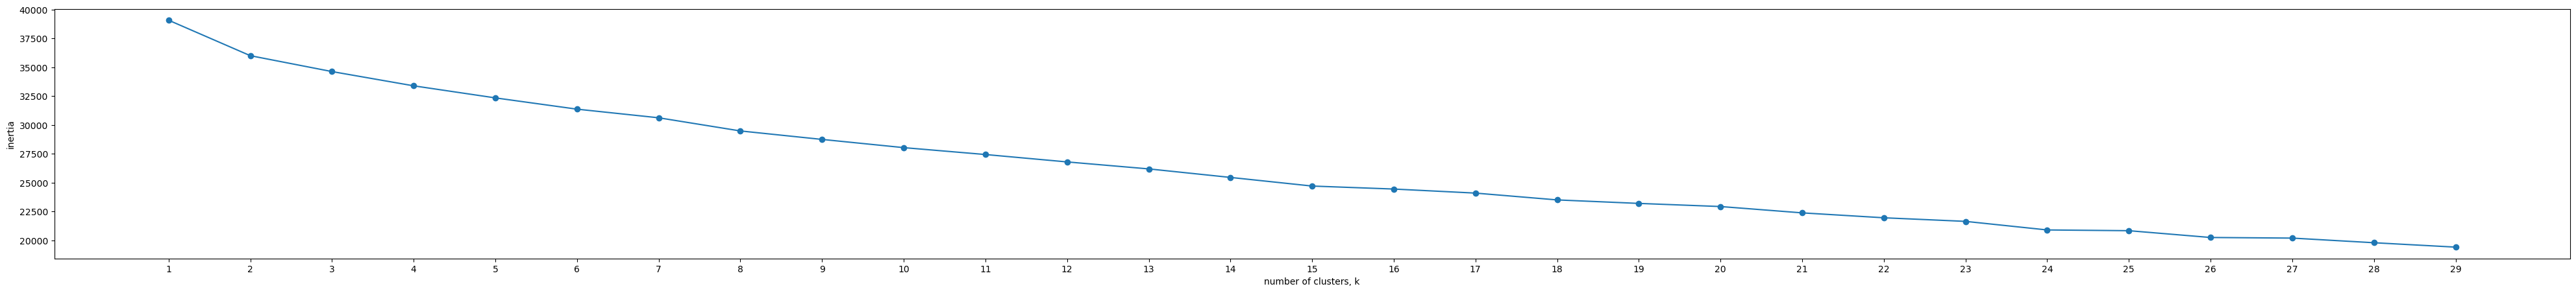

In [37]:
ks = range(1,30)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, init='k-means++'
    )
    model.fit(df_temp)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(50, 5))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

보이는 것처럼 그래프에는 딱히 기울기가 급격히 변하는 부분이 나타나지 않았다. 따라서 엘보우 기법으로는 적절한 k 값을 찾기 어려울 것으로 여겨진다.

적합한 k 값을 찾는 또다른 방법으로 실루엣 점수가 있다. 이 실루엣 점수가 가장 높은 k 값으로도 시도해 본다. 벡터의 총 개수가 435개이기 때문에 0부터 435를 범위로 정해서 가장 큰 실루엣 점수를 가지는 k 값을 찾아보려 했으나, 350 전후로 오류가 발생하여 300개로 시도해 보았다.

In [38]:
# 최적의 클러스터 개수 찾기: 실루엣 점수
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, random_state=seed).fit(df_temp) for k in range(1, 300)] # 최대 300
silhouette_scores = [silhouette_score(df_temp, model.labels_) for model in kmeans_per_k[1:]]

c:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


In [39]:
# print(silhouette_scores)
print('최대 실루엣 점수를 보인 k 값: ' + str(silhouette_scores.index(max(silhouette_scores))))
print('최대 실루엣 점수: ' + str(max(silhouette_scores)))

최대 실루엣 점수를 보인 k 값: 270
최대 실루엣 점수: 0.21895772162415467


최대 실루엣 점수를 나타낸 k값이 270이었으므로, 270으로 시도해 본다.

In [40]:
k = 270
model_kmeans = KMeans(n_clusters=k, max_iter=10000, random_state=seed)
result_kmeans = model_kmeans.fit_predict(df_temp) # k-Means의 .fit_predict() 함수를 사용

# 군집화한 레이블값들을 df 에 추가하기
df['cluster_label_kmeans'] = result_kmeans

for i in range(0, len(result_kmeans)):
    print(result_kmeans[i])

6
147
62
38
12
68
73
124
22
129
36
95
164
239
6
261
256
6
35
13
21
179
6
35
240
77
158
257
6
35
146
221
150
150
225
190
8
263
236
6
35
80
138
197
242
246
6
104
87
228
263
33
170
6
104
106
188
23
141
13
55
201
4
91
13
55
209
237
125
13
116
122
205
42
85
200
255
57
34
147
177
52
143
118
53
62
95
98
204
61
62
71
19
105
168
224
26
24
114
153
29
247
5
144
114
215
217
198
29
30
5
220
83
70
120
5
70
219
66
5
70
154
234
216
38
38
163
103
115
194
74
32
72
199
89
142
176
38
44
59
165
14
186
75
107
14
186
76
38
40
81
230
74
8
100
130
268
156
76
38
28
137
184
135
231
128
151
178
39
92
229
157
3
191
173
131
210
20
49
15
3
260
187
252
77
112
60
93
12
202
259
42
12
69
44
17
50
27
0
8
37
12
44
250
17
218
95
264
226
12
78
133
251
50
241
0
108
8
2
26
12
37
127
46
46
235
222
208
68
189
232
126
108
86
266
183
68
223
65
9
51
119
90
161
58
121
227
97
124
196
245
10
145
102
31
175
88
101
182
84
111
73
213
96
45
159
110
160
73
11
180
67
99
12
29
258
79
166
113
63
63
248
94
47
174
29
56
139
181
25
155
195
152


In [41]:
model_kmeans.labels_ # 클러스터링 수행 결과가 labels_ 속성에 저장됨

array([  6, 147,  62,  38,  12,  68,  73, 124,  22, 129,  36,  95, 164,
       239,   6, 261, 256,   6,  35,  13,  21, 179,   6,  35, 240,  77,
       158, 257,   6,  35, 146, 221, 150, 150, 225, 190,   8, 263, 236,
         6,  35,  80, 138, 197, 242, 246,   6, 104,  87, 228, 263,  33,
       170,   6, 104, 106, 188,  23, 141,  13,  55, 201,   4,  91,  13,
        55, 209, 237, 125,  13, 116, 122, 205,  42,  85, 200, 255,  57,
        34, 147, 177,  52, 143, 118,  53,  62,  95,  98, 204,  61,  62,
        71,  19, 105, 168, 224,  26,  24, 114, 153,  29, 247,   5, 144,
       114, 215, 217, 198,  29,  30,   5, 220,  83,  70, 120,   5,  70,
       219,  66,   5,  70, 154, 234, 216,  38,  38, 163, 103, 115, 194,
        74,  32,  72, 199,  89, 142, 176,  38,  44,  59, 165,  14, 186,
        75, 107,  14, 186,  76,  38,  40,  81, 230,  74,   8, 100, 130,
       268, 156,  76,  38,  28, 137, 184, 135, 231, 128, 151, 178,  39,
        92, 229, 157,   3, 191, 173, 131, 210,  20,  49,  15,   

최대 실루엣 점수를 보인 k값인 270을 클러스터 개수로 정하여 분류했을 때를 기준으로 한 클러스터링 결과이다.

In [42]:
for cluster_num in set(model_kmeans.labels_):
    print("kmeans cluster num : {}".format(cluster_num))
    temp_df = df[df['cluster_label_kmeans'] == cluster_num] # cluster num 별로 조회
    for title in temp_df['Document']:
        print(title)
    print()

kmeans cluster num : 0
프로그램 적재와 실행
 프로그램 적재와 실행 (p ~ )

kmeans cluster num : 1
 대체로, 계층 구조와 비슷하나 융통성이 있음

kmeans cluster num : 2
프로세스, 사용자, 컴퓨터 시스템 간에 가상 접속을 이루기 위한 기법을제공한다

kmeans cluster num : 3
 시스템이 시동될 때 하나의명령해석기 호출
 사용자가 로그인할 때, 사용자가 선택한 쉘 (명령해석기)이 실행

kmeans cluster num : 4
커널 또는 시스템 프로그램으로 구현

kmeans cluster num : 5
운영체제 커널 내에 있는 요청된 시스템 콜을 하고
시스템 콜 파라미터 전달
시스템 콜 파라미터 전달 : 테이블
시스템 콜 파라미터 전달 : 스택

kmeans cluster num : 6
 운영체제 서비스 (Operating System Services)
운영체제 서비스 : View
운영체제 서비스 (Operating System Services)  
운영체제 서비스 (Operating System Services)  
운영체제 서비스 (Operating System Services)  
운영체제 서비스 (Operating System Services)  
운영체제 서비스 (Operating System Services)  
운영체제 서비스 (Operating System Services)  

kmeans cluster num : 7
혼용 구조는 여러 기법을 사용하여 성능, 보안, 사용성 요구를 해결한다

kmeans cluster num : 8
통신
 통신(Communications)
통신
 통신

kmeans cluster num : 9
기법 (Mechanism):  어떻게 할 것인가?

kmeans cluster num : 10
현재는 C, C++ 사용

kmeans cluster num : 11
 최초의 UNIX

kmeans cluster num : 12
 시스템 프로그램 (S

실루엣 점수는 서로 다른 k 값을 가진 클러스터링 결과 간에도 비교할 수 있다. 클러스터의 수에 따라 다르게 시각화를 진행해 보았고, 균등하게 나올수록 클러스터링 품질이 좋다고 할 수 있다.

In [43]:
# https://zephyrus1111.tistory.com/193
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, init='k-means++')
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

우선 DBSCAN의 14개와 병합 클러스터링의 26개를 비교해 본다. 병합 클러스터링의 26개가 더욱 높은 실루엣 점수를 나타냈다.

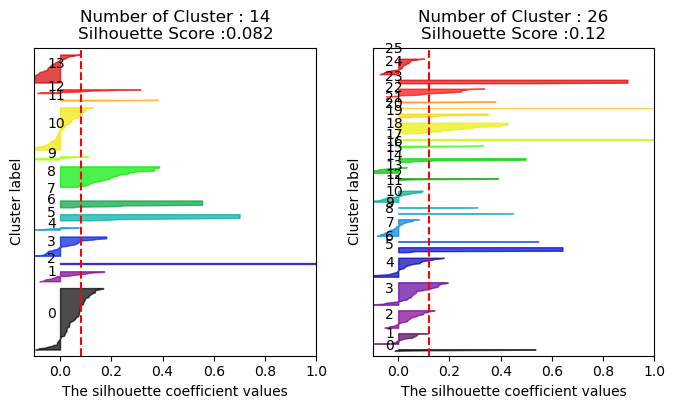

In [44]:
visualize_silhouette([14,26], df_temp)

다음으로, 단원 수인 10개와 개념 수인 33개를 비교해 본다. 개념 수인 33개의 실루엣 점수가 상대적으로 좋게 나왔다.

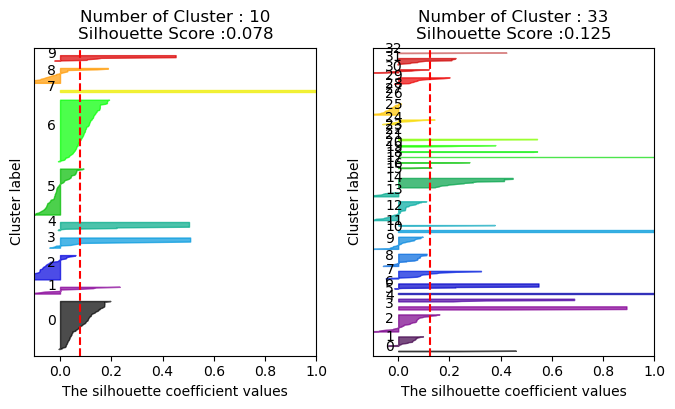

In [45]:
visualize_silhouette([10,33], df_temp)

PDF 페이지수인 64개와 최대 실루엣 점수를 보인 270개도 비교해 본다.

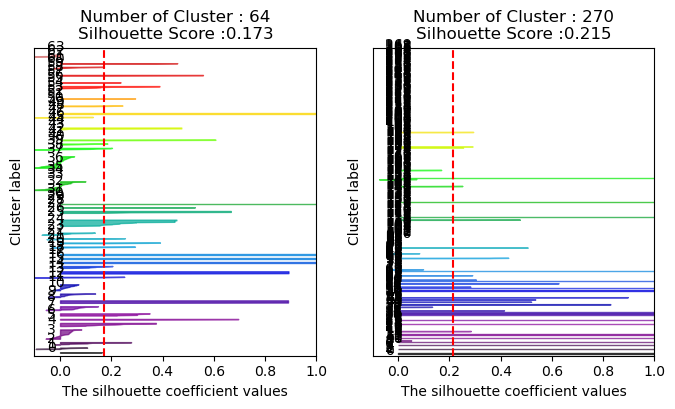

In [46]:
visualize_silhouette([64,270], df_temp)

결과적으로 클러스터 개수에 따른 실루엣 점수 순위는 다음과 같다. 전반적으로 클러스터 개수가 많아질수록 실루엣 점수가 높아져서 270에서 최고점에 도달하는 것을 알 수 있다. 하지만 최적의 클러스터 개수인 270개로 클러스터링해도 문제로서 유의미한 품질의 결과는 나타내지 못했다.

270개: 0.216<br />
64개: 0.159<br />
33개: 0.129<br />
26개: 0.11<br />
14개: 0.084<br />
10개: 0.056